In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

test_id = test_df['Id']
train_id = train_df['Id']

In [3]:
df = pd.concat((train_df, test_df))

# Need to clean the data
df["Exterior2nd"] = df["Exterior2nd"].replace({"Brk Cmn": "BrkComm"})
df["GarageYrBlt"] = df["GarageYrBlt"].where(df.GarageYrBlt <= 2010, df.YearBuilt)

# Replace features that begin with a number with the string equivalent
df.rename(columns={"1stFlrSF": "FirstFlrSF", "2ndFlrSF": "SecondFlrSF", "3SsnPorch": "ThreeSsnPorch"}, inplace=True)

# List all the features names
print(df.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'FirstFlrSF', 'SecondFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'Paved

In [4]:
# Convert categorical features to numeric

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].astype('category').cat.codes

print(df.head())

   Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape   
0   1          60         3         65.0     8450       1     -1         3  \
1   2          20         3         80.0     9600       1     -1         3   
2   3          60         3         68.0    11250       1     -1         0   
3   4          70         3         60.0     9550       1     -1         0   
4   5          60         3         84.0    14260       1     -1         0   

   LandContour  Utilities  ...  PoolArea  PoolQC  Fence  MiscFeature  MiscVal   
0            3          0  ...         0      -1     -1           -1        0  \
1            3          0  ...         0      -1     -1           -1        0   
2            3          0  ...         0      -1     -1           -1        0   
3            3          0  ...         0      -1     -1           -1        0   
4            3          0  ...         0      -1     -1           -1        0   

   MoSold  YrSold  SaleType  SaleCondition  

In [5]:
# For missing numeric values, fill with the mean of the column

for col in df.columns:
    if df[col].dtype != 'object' and col != 'SalePrice' and col != 'Id':
        df[col] = df[col].fillna(df[col].mean())

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,-1,3,3,0,...,0,-1,-1,-1,0,2,2008,8,4,208500.0
1,2,20,3,80.0,9600,1,-1,3,3,0,...,0,-1,-1,-1,0,5,2007,8,4,181500.0
2,3,60,3,68.0,11250,1,-1,0,3,0,...,0,-1,-1,-1,0,9,2008,8,4,223500.0
3,4,70,3,60.0,9550,1,-1,0,3,0,...,0,-1,-1,-1,0,2,2006,8,0,140000.0
4,5,60,3,84.0,14260,1,-1,0,3,0,...,0,-1,-1,-1,0,12,2008,8,4,250000.0


In [6]:
# Convert cataegorical features to numeric

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].astype('category').cat.codes
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,-1,3,3,0,...,0,-1,-1,-1,0,2,2008,8,4,208500.0
1,2,20,3,80.0,9600,1,-1,3,3,0,...,0,-1,-1,-1,0,5,2007,8,4,181500.0
2,3,60,3,68.0,11250,1,-1,0,3,0,...,0,-1,-1,-1,0,9,2008,8,4,223500.0
3,4,70,3,60.0,9550,1,-1,0,3,0,...,0,-1,-1,-1,0,2,2006,8,0,140000.0
4,5,60,3,84.0,14260,1,-1,0,3,0,...,0,-1,-1,-1,0,12,2008,8,4,250000.0


In [7]:
# Checking for missing values

for col in df.columns:
    if df[col].dtype != 'object' and col != 'SalePrice' and col != 'Id':
        if df[col].isnull().sum() > 0:
            print(col, df[col].isnull().sum())
# if sale price is Nan, then put a 0
df['SalePrice'] = df['SalePrice'].fillna(0)

In [8]:
train_df = df.loc[train_df.index, :]
test_df = df.loc[test_df.index, :]

In [9]:
# Time to select features
from sklearn.feature_selection import SelectKBest, f_regression

X = train_df.copy()
y = X.pop('SalePrice')

# Select the 20 best features
Kbest = SelectKBest(f_regression, k=20).fit(X, y)
Kbest.get_support(indices=True)
# get the labels of the selected features
print(X.columns[Kbest.get_support(indices=True)])

Index(['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt',
       'YearRemodAdd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'TotalBsmtSF',
       'FirstFlrSF', 'GrLivArea', 'FullBath', 'KitchenQual', 'TotRmsAbvGrd',
       'Fireplaces', 'FireplaceQu', 'GarageYrBlt', 'GarageCars', 'GarageArea'],
      dtype='object')


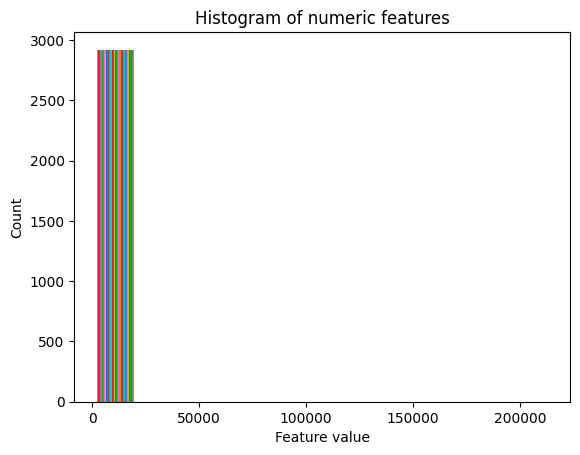

<Axes: >

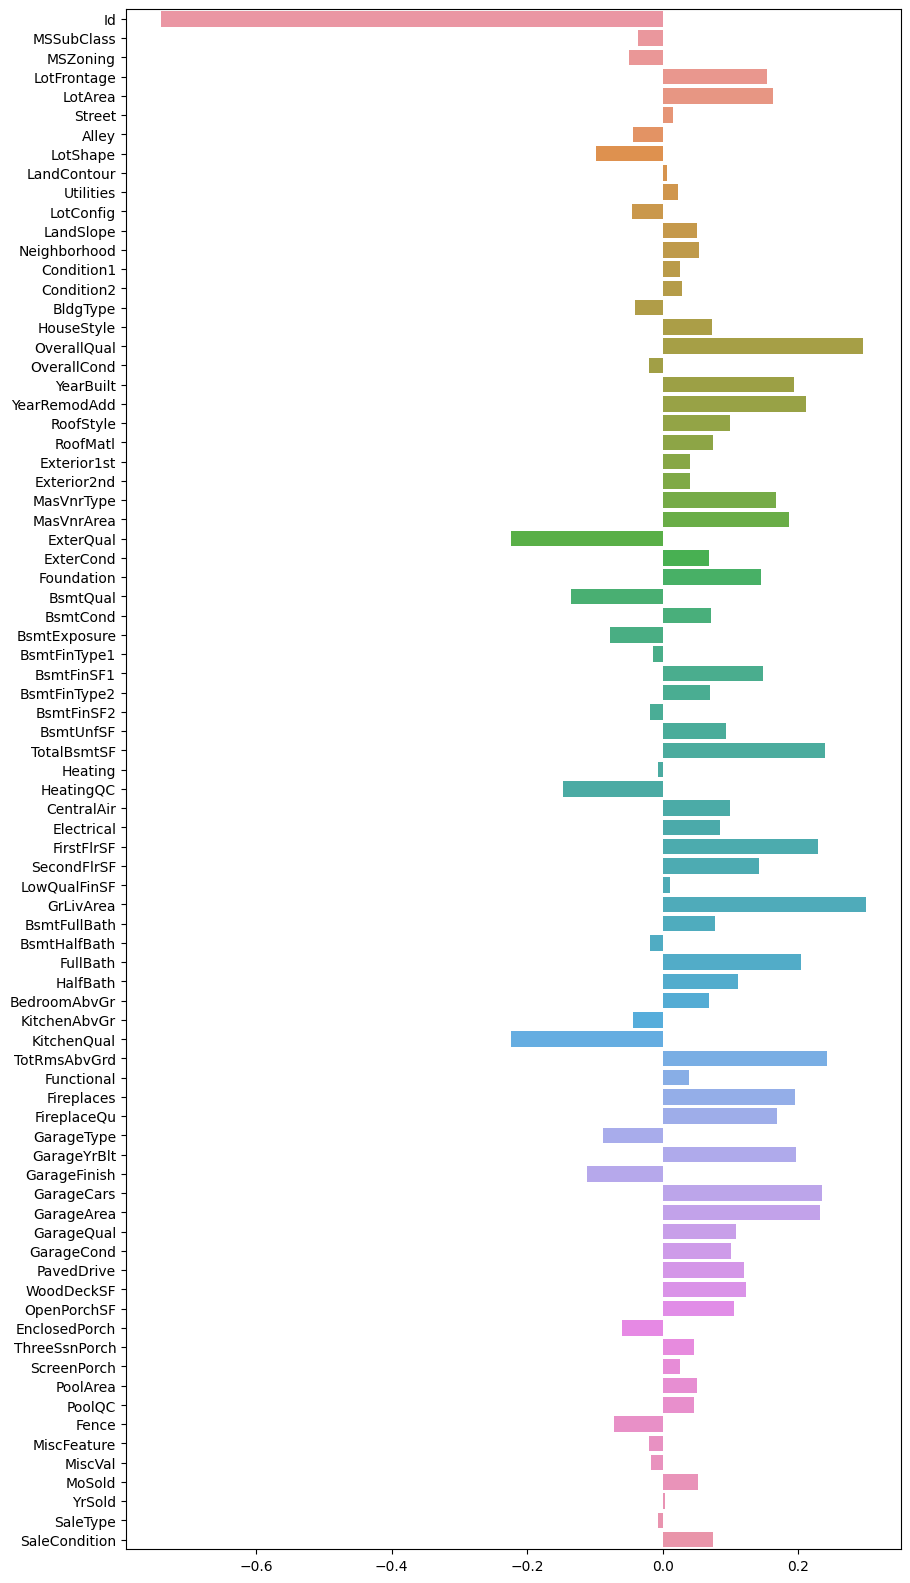

In [10]:
# Graph the column names and their correlation with SalePrice

plt.hist(X)
plt.title('Histogram of numeric features')
plt.xlabel('Feature value')
plt.ylabel('Count')
plt.show()

# Get correlations between features and target variable
corr = X.assign(y=y).corr()['y']

# drop last value since it is the correlation with itself
corr = corr[:-1]
ax, fig = plt.subplots(figsize=(10, 20))
# ds = pd.Series({'x': corr.index, 'y': corr.values})
sns.barplot(x=corr.values, y=corr.index)

In [ ]:
# Create heatmap of correlations
corr = X.assign(y=y).corr()
plt.figure(figsize=(20, 20))
plt.title('Correlation heatmap')
plt.xlabel('Feature')
plt.ylabel('Feature')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.imshow(corr, cmap='winter', interpolation='nearest')
plt.show()

In [11]:
# Filter
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=0.1)

sel.fit(X)
sel.transform(X)
sel.get_support(indices=True)

# Print out labels of selected features
print(X.columns[sel.get_support(indices=True)])
filterLabels = X.columns[sel.get_support(indices=True)]

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Alley',
       'LotShape', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       'Electrical', 'FirstFlrSF', 'SecondFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ThreeSsnPorch', 'ScreenPorch', 'PoolArea', 'Fence',
       

In [12]:
# Embedded
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l1', C=1.0, solver='liblinear', multi_class='ovr')
lr.fit(X, y)
print('Training accuracy:', lr.score(X, y))
print('Test accuracy:', lr.score(X, y))

print('Intercept:', lr.intercept_)
np.set_printoptions(8)

# Print out labels of selected features
print(X.columns[lr.coef_[0]!=0])
embeddedLabels = X.columns[lr.coef_[0]!=0]

In [ ]:
# Wrapper
from sklearn.feature_selection import RFE

lr = LogisticRegression(penalty='l2', C=1.0, solver='liblinear', multi_class='ovr')
rfe = RFE(lr, n_features_to_select=20, step=1)

X_train_sub = rfe.fit_transform(X, y)